A time series is a sequence of data points collected at specific time intervals. In other words, it's a dataset where each data point is associated with a particular timestamp or time period. Time series data is used to observe how a variable changes over time and to identify patterns, trends, and fluctuations in that variable. This type of data is commonly encountered in various fields such as economics, finance, physics, biology, weather forecasting, and more.

Time series data can be univariate or multivariate. Univariate time series involves a single variable measured over time, while multivariate time series involves multiple variables measured over the same time intervals. The primary goal when analyzing time series data is often to forecast future values based on the patterns observed in the historical data.

Some common examples of time series data include:

1. **Stock Prices**: Daily closing prices of a company's stock over a period of time.
2. **Weather Data**: Daily temperature readings recorded at a specific location.
3. **Economic Indicators**: Monthly unemployment rates over several years.
4. **Web Traffic**: Hourly website visitors over a week.
5. **Sensor Readings**: Time-stamped measurements from sensors in industrial processes.
6. **Healthcare Data**: Daily patient admissions to a hospital.
7. **Social Media Activity**: Hourly tweet counts related to a specific topic.

Analyzing time series data involves various techniques, including:

1. **Descriptive Analysis**: Identifying trends, seasonality, and anomalies in the data.
2. **Forecasting**: Using historical patterns to predict future values of the time series.
3. **Smoothing**: Applying techniques to remove noise and highlight underlying trends.
4. **Decomposition**: Separating a time series into its trend, seasonality, and residual components.
5. **Statistical Models**: Utilizing techniques like ARIMA (AutoRegressive Integrated Moving Average) for forecasting.
6. **Machine Learning**: Employing algorithms like recurrent neural networks (RNNs) and Long Short-Term Memory (LSTM) networks for more complex analyses.

Time series analysis plays a crucial role in making informed decisions, predicting outcomes, and understanding the behavior of various phenomena that evolve over time.

#import the ness lib.
#import the data
#EDA
#FEATURE ENG.--- encoding, rescaling is coming
#Feature selction--->chi,vif,iv,rfe etc
#model building
#model evalution
#model deployment

Ness. lib

In [ ]:
import pandas as pd  #data manipuation
import numpy as np  #numerical python
import matplotlib.pyplot as plt  #visualisation
import seaborn as sns #visualisation


In [ ]:
#load the data
data=pd.read_csv('/content/AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [ ]:
data.shape

(144, 2)

In [ ]:
12*12   #12 years data

144

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
data['Month']=pd.to_datetime(data['Month']) #coverting month column to date time because previous it is object

In [ ]:
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


<Axes: >

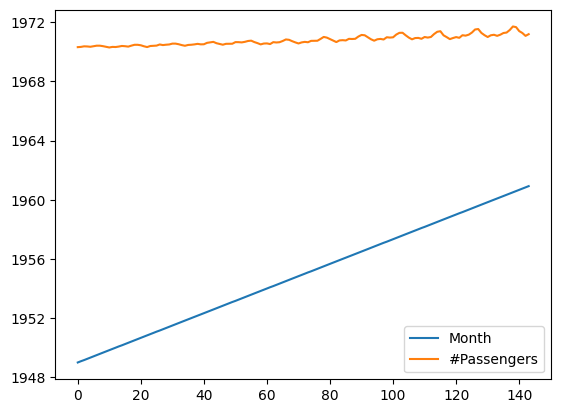

In [ ]:
data.plot()

In [ ]:
data.index=data['Month']  #making month as index column

In [ ]:
data

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121
...,...,...
1960-08-01,1960-08-01,606
1960-09-01,1960-09-01,508
1960-10-01,1960-10-01,461


In [ ]:
del data['Month']   #delete the column not index

In [ ]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

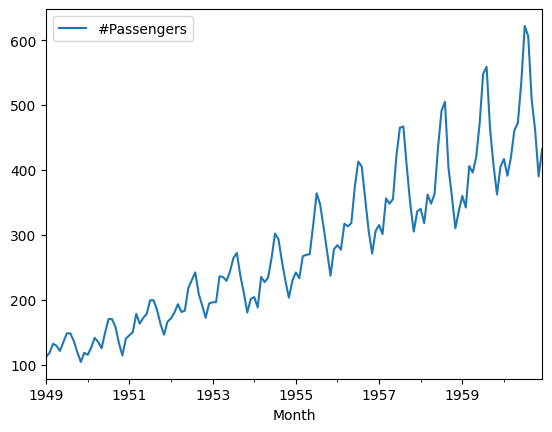

In [ ]:
data.plot()

In [ ]:

mean_log=data.rolling(window=12).mean()    #rolling window means how many month average you want
std_log=data.rolling(window=12).std()

In [ ]:
mean_log.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [ ]:
'''
jan-1----na
feb-2--na
mar-3--na
apr-4--
may-3--
jun-2--
jul-5--
aug-6--
sep-4--
oct-3--
nov-2--
dec-1--->3
jan-5-->41/13-->3
feb-4
'''

'\njan-1----na\nfeb-2--na\nmar-3--na\napr-4--\nmay-3--\njun-2--\njul-5--\naug-6--\nsep-4--\noct-3--\nnov-2--\ndec-1--->3\njan-5-->41/13-->3\nfeb-4\n'

Text(0.5, 1.0, 'Rolling mean & statandard deviation')

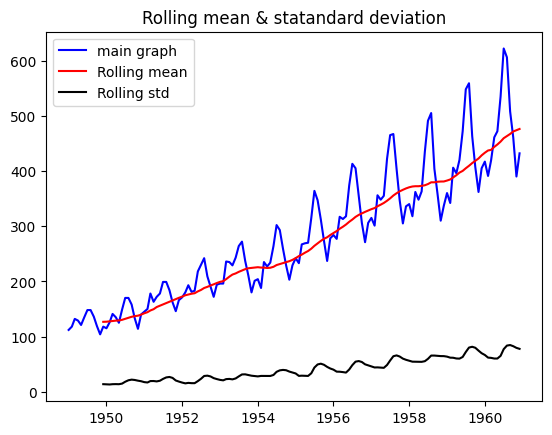

In [ ]:
plt.plot(data,color='blue',label='main graph')
plt.plot(mean_log,color='red',label='Rolling mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean & statandard deviation')

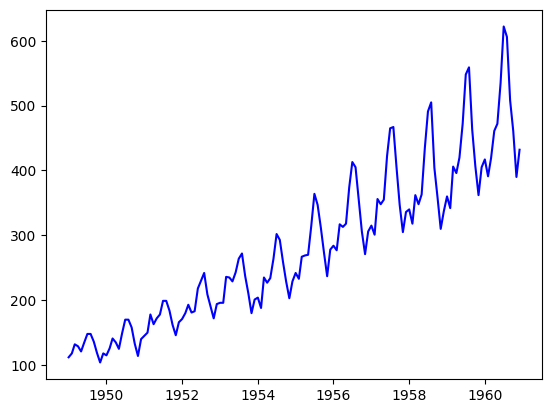

In [ ]:
plt.plot(data,color='blue',label='Orginal')

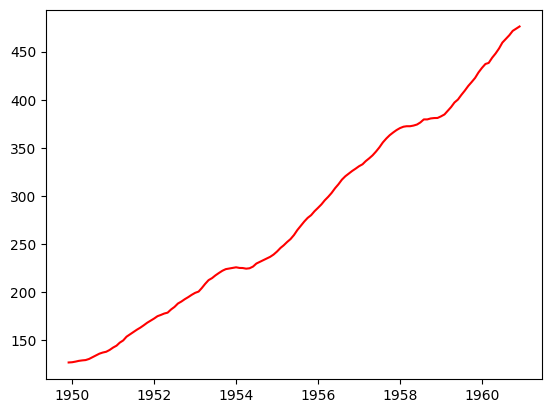

In [ ]:
plt.plot(mean_log,color='red',label='Rolling mean')

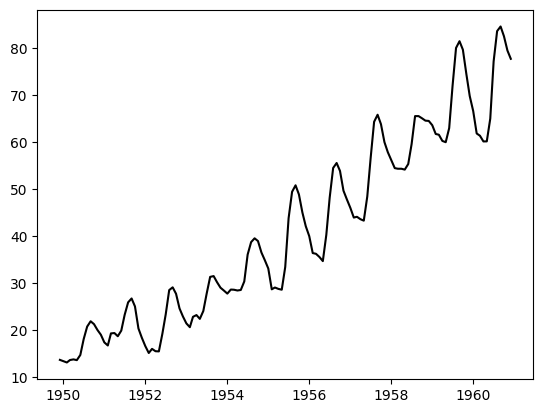

In [ ]:
plt.plot(std_log,color='black',label='Rolling std')

In [ ]:
#checking the stationarity
from statsmodels.tsa.stattools import adfuller

In [ ]:
result=adfuller(data['#Passengers'])
result[1]

0.991880243437641

In [ ]:
p_value=result[1]
p_value

0.991880243437641

In [ ]:
#refrece
if p_value < 0.05:
  print('stationarity is present')
else:
  print('no stationarity')

no stationarity


<Axes: xlabel='Month'>

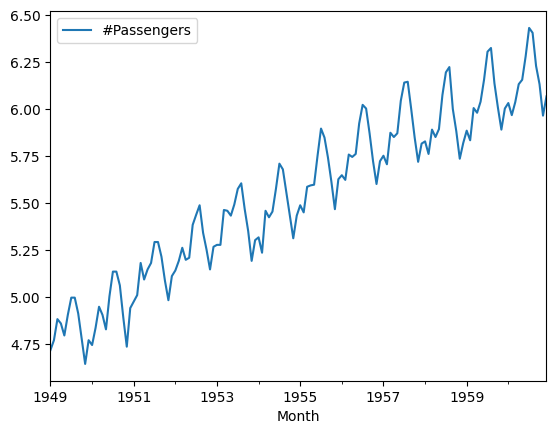

In [ ]:
first_log=np.log(data)  #converting data into log scale
first_log=first_log.dropna()
first_log.plot()

Text(0.5, 1.0, 'Rolling mean & statandard deviation')

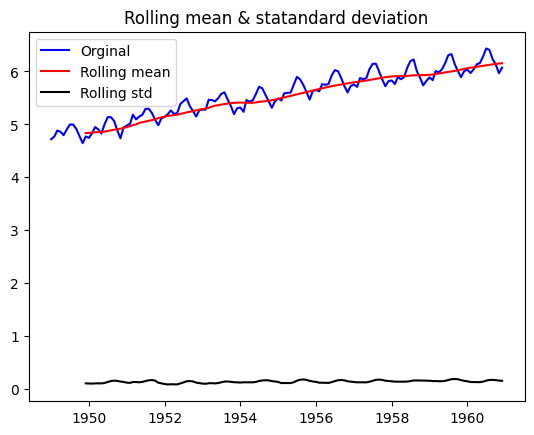

In [ ]:
mean_log=first_log.rolling(window=12).mean()    #rolling window means how many month average you want
std_log=first_log.rolling(window=12).std()
plt.plot(first_log,color='blue',label='Orginal')
plt.plot(mean_log,color='red',label='Rolling mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean & statandard deviation')

In [ ]:
result=adfuller(first_log['#Passengers'])
result[1]

0.4223667747703874

we use two step

1-convert it into the log and check

2-second step is reduce the

In [ ]:
new_data=first_log-mean_log
new_data=new_data.dropna()

1            1-3         -2          4
2            2-3         -1          1
3            3-3          0          0
4            4-3          1          1
5            5-3          2          4
=3

```
# This is formatted as code
```

                                  =2

In [ ]:
result=adfuller(new_data['#Passengers'])
result[1]

0.022234630001242206

Text(0.5, 1.0, 'Rolling mean & statandard deviation')

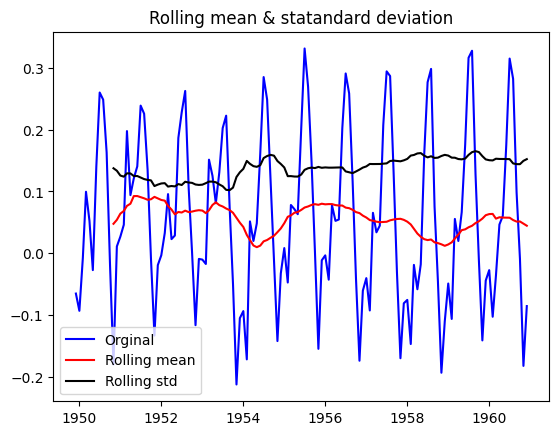

In [ ]:
mean_log=new_data.rolling(window=12).mean()    #rolling window means how many month average you want
std_log=new_data.rolling(window=12).std()
plt.plot(new_data,color='blue',label='Orginal')
plt.plot(mean_log,color='red',label='Rolling mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean & statandard deviation')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

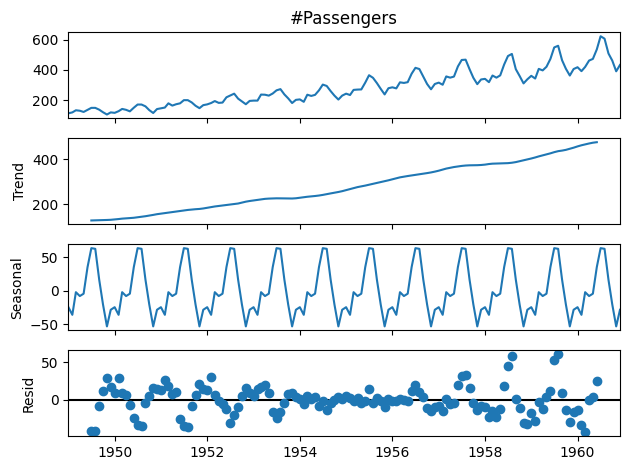

In [ ]:
old_decompose=seasonal_decompose(data['#Passengers'].dropna())
old_decompose.plot();

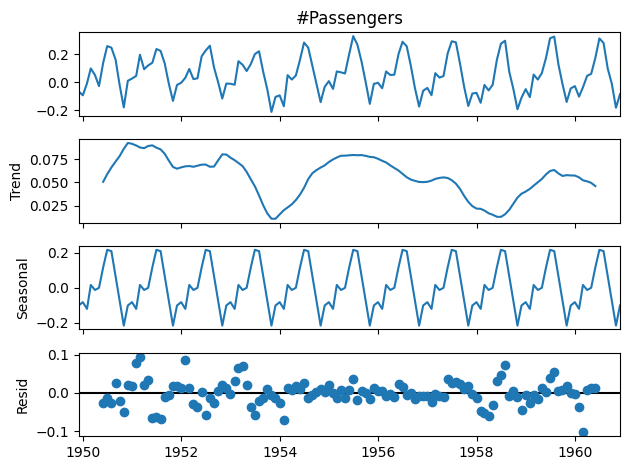

In [ ]:
new_decompose=seasonal_decompose(new_data['#Passengers'].dropna())
new_decompose.plot();

In [ ]:
#ARIMA---AR+I+MA
#pdq
#p-autoregressive(AR)
#d-defferencing(I)
#q-moving average(MA)

In [ ]:
#tomorrow temp
#AR-->2--->last two temp. --->
#I--->def
#ma-->smothing the data

day1-70
day2-72
day3-75
day4-68
day5-71
day6-74
day7-73

day 1-3
(70+72+75)/3=72.3


In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.7 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

In [ ]:
arima_model=auto_arima(data['#Passengers'],seasonal=True,trace=True)   #old data to show our steps are correct
#Best model:  ARIMA(4,1,3)(0,0,0)[0]   --->Arima(p,d,q)(Seaonal AR,Seasonal I ,Seasonal MA)[Seaonality]

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.85 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.89 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=2.83 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.53 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

#new data to check no d is required

In [ ]:
arima_model=auto_arima(new_data['#Passengers'],seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-277.439, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-152.169, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-233.989, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-246.526, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-133.698, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-252.154, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-279.238, Time=0.38 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-254.090, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-260.142, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-277.308, Time=0.49 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-261.472, Time=0.17 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-285.263, Time=0.55 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-283.078, Time=0.59 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-267.800, Time=0.79 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
new_data.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [ ]:
train=new_data.iloc[:120]['#Passengers']   #taking train data
test=new_data.iloc[121:]['#Passengers']   #taking test data
model=ARIMA(train,order=(3,0,2))   #making arima model
model_fit=model.fit() #fit the model
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                 ARIMA(3, 0, 2)   Log Likelihood                 134.726
Date:                Sun, 03 Nov 2024   AIC                           -255.453
Time:                        16:55:13   BIC                           -235.940
Sample:                    12-01-1949   HQIC                          -247.529
                         - 11-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0563      0.006      8.958      0.000       0.044       0.069
ar.L1          0.7851      0.151      5.199      0.000       0.489       1.081
ar.L2          0.2854      0.186      1.531      0.126      -0.080       0.651
ar.L3         -0.5319      0.120     -4.440      0.000      -0.767      -0.297
ma.L1          0.1278      0.122      1.043      0.297      -0.112       0.368
ma.L2         -0.7497      0.093     -8.051      0.000      -0.932      -0.567
sigma2         0.0061      0.001      5.414      0.000       0.004       0.008
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                 3.85
Prob(Q):                              0.53   Prob(JB):                         0.15
Heteroskedasticity (H):               0.98   Skew:                             0.11
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1959-07-01,0.316430
1959-08-01,0.327838
1959-09-01,0.128057


<Axes: xlabel='Month'>

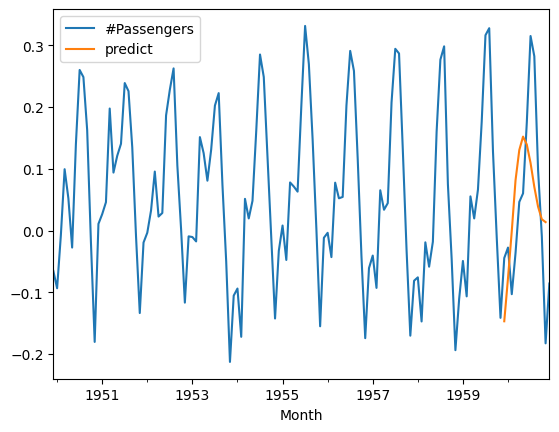

In [ ]:
new_data['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','predict']].plot()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

In [ ]:
model=SARIMAX(train,order=(3,0,2),seasonal_order=(3,0,2,12))
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary star

<Axes: xlabel='Month'>

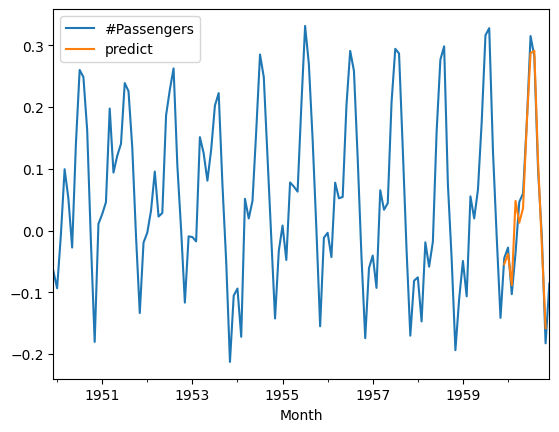

In [ ]:
new_data['predict']=model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

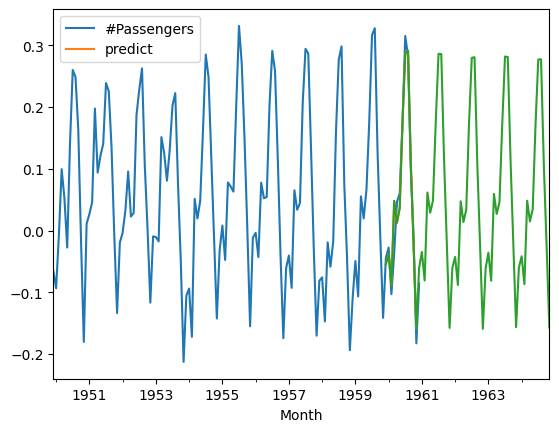

In [ ]:
forecast=model.forecast(steps=60)
new_data.plot()
forecast.plot()

In [ ]:
new_data.shape

(133, 2)

<Axes: xlabel='Month'>

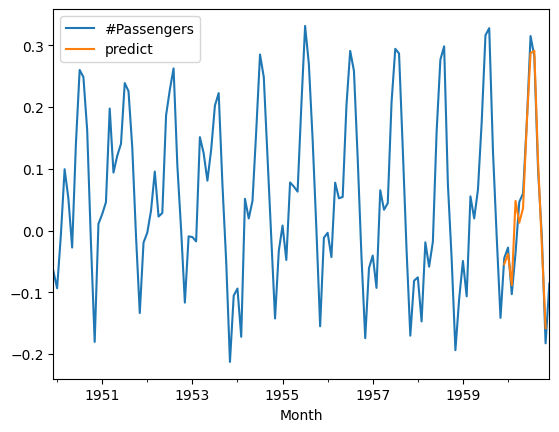

In [ ]:
new_data.plot()

<Axes: >

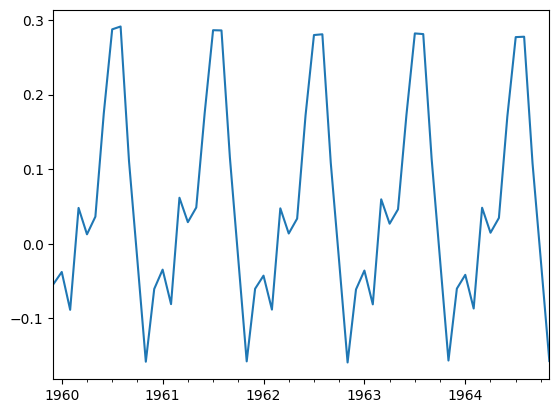

In [ ]:
forecast.plot()